In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv("./data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
X = df.drop("math_score", axis=1)

In [6]:
y = df["math_score"]

In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
# Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", categorical_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [14]:
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    r2_squared = r2_score(y_true, y_pred) ** 2
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return r2, r2_squared, mae, mse

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_r2, model_train_r2_squared, model_train_mae, model_train_mse = evaluate_model(y_train, y_train_pred)
    model_test_r2, model_test_r2_squared, model_test_mae, model_test_mse = evaluate_model(y_test, y_test_pred)

    print(f"{list(models.keys())[i]} Model Evaluation")
    model_list.append(list(models.keys())[i])

    print("Training Performance")
    print("R2 Score: ", model_train_r2)
    print("R2 Squared: ", model_train_r2_squared)
    print("Mean Absolute Error: ", model_train_mae)
    print("Mean Squared Error: ", model_train_mse)

    print("---------------------------")

    print("Testing Performance")
    print("R2 Score: ", model_test_r2)
    print("R2 Squared: ", model_test_r2_squared)
    print("Mean Absolute Error: ", model_test_mae)
    print("Mean Squared Error: ", model_test_mse)
    print("\n\n")
    r2_list.append(model_test_r2)

    print("===============================================")
    print("\n")

Linear Regression Model Evaluation
Training Performance
R2 Score:  0.8742565651513869
R2 Squared:  0.7643245417103013
Mean Absolute Error:  4.267109375
Mean Squared Error:  28.348541259765625
---------------------------
Testing Performance
R2 Score:  0.8803449074540941
R2 Squared:  0.7750071560803575
Mean Absolute Error:  4.2158203125
Mean Squared Error:  29.116678771972655





Lasso Model Evaluation
Training Performance
R2 Score:  0.8071462015863456
R2 Squared:  0.6514849907352658
Mean Absolute Error:  5.206302661246526
Mean Squared Error:  43.47840400585579
---------------------------
Testing Performance
R2 Score:  0.8253197323627853
R2 Squared:  0.6811526606273796
Mean Absolute Error:  5.157881810347763
Mean Squared Error:  42.5064168384116





Ridge Model Evaluation
Training Performance
R2 Score:  0.8743042615212909
R2 Squared:  0.7644079417142898
Mean Absolute Error:  4.264987823725981
Mean Squared Error:  28.33778823308244
---------------------------
Testing Performance
R2 Scor

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850551
8,AdaBoost Regressor,0.847759
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.749731


In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


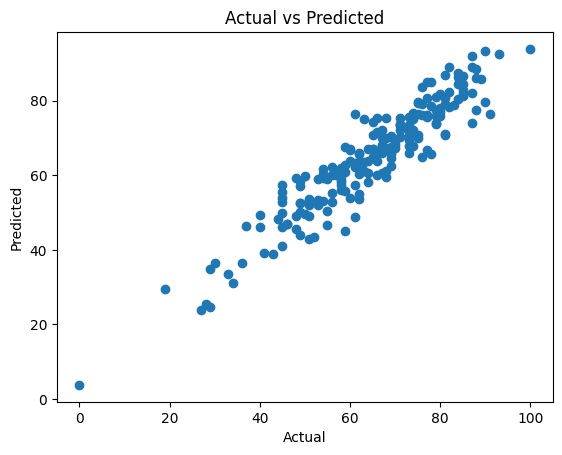

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted');

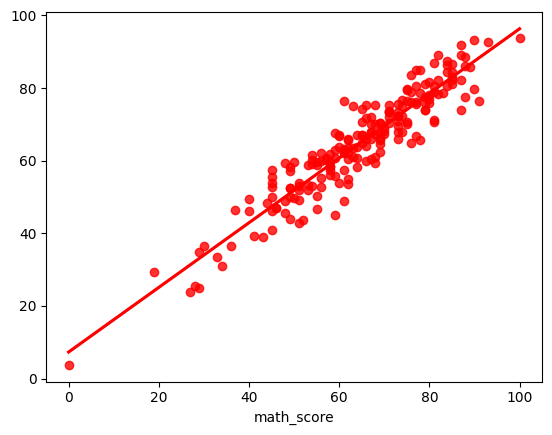

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
